In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [37]:
path = '/kaggle/input/iris/Iris.csv'
df = pd.read_csv(path, index_col ='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
df.isnull().values.any()

False

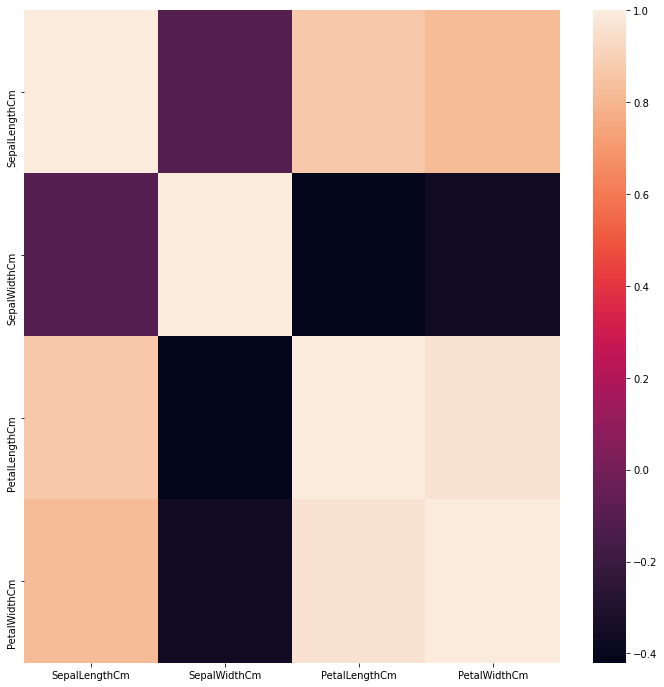

In [39]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize= (12,12))
sb.heatmap(df.corr())
plt.show()

In [40]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [41]:
set(df['Species'].values)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

model = Sequential()
model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))
model.summary()

In [ ]:
from keras.utils import np_utils

feature_col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
predicted_class_names = ['Species']

X = df[feature_col_names].values
Y = df[predicted_class_names].values

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_Y = np_utils.to_categorical(encoded_Y)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,dummy_Y, test_size=0.3, random_state = 42)

In [36]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150,validation_data=(X_test,y_test))

Train on 105 samples, validate on 45 samples
Epoch 1/150
105/105 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.6476 - val_loss: 0.4113 - val_accuracy: 0.7111
Epoch 2/150
105/105 [==============================] - 0s 77us/step - loss: 0.5031 - accuracy: 0.6476 - val_loss: 0.4112 - val_accuracy: 0.7111
Epoch 3/150
105/105 [==============================] - 0s 77us/step - loss: 0.5037 - accuracy: 0.6476 - val_loss: 0.4113 - val_accuracy: 0.7111
Epoch 4/150
105/105 [==============================] - 0s 73us/step - loss: 0.5029 - accuracy: 0.6476 - val_loss: 0.4113 - val_accuracy: 0.7111
Epoch 5/150
105/105 [==============================] - 0s 81us/step - loss: 0.5029 - accuracy: 0.6476 - val_loss: 0.4112 - val_accuracy: 0.7111
Epoch 6/150
105/105 [==============================] - 0s 85us/step - loss: 0.5029 - accuracy: 0.6476 - val_loss: 0.4110 - val_accuracy: 0.7111
Epoch 7/150
105/105 [==============================] - 0s 83us/step - loss: 0.5025 - accurac

105/105 [==============================] - 0s 77us/step - loss: 0.3597 - accuracy: 0.9810 - val_loss: 0.2878 - val_accuracy: 0.9556
Epoch 58/150
105/105 [==============================] - 0s 78us/step - loss: 0.3549 - accuracy: 0.9810 - val_loss: 0.2838 - val_accuracy: 0.9556
Epoch 59/150
105/105 [==============================] - 0s 75us/step - loss: 0.3507 - accuracy: 0.9810 - val_loss: 0.2804 - val_accuracy: 0.9556
Epoch 60/150
105/105 [==============================] - 0s 86us/step - loss: 0.3467 - accuracy: 0.9810 - val_loss: 0.2769 - val_accuracy: 0.9556
Epoch 61/150
105/105 [==============================] - 0s 84us/step - loss: 0.3420 - accuracy: 0.9810 - val_loss: 0.2737 - val_accuracy: 0.9778
Epoch 62/150
105/105 [==============================] - 0s 85us/step - loss: 0.3382 - accuracy: 0.9810 - val_loss: 0.2708 - val_accuracy: 0.9778
Epoch 63/150
105/105 [==============================] - 0s 89us/step - loss: 0.3338 - accuracy: 0.9714 - val_loss: 0.2679 - val_accuracy: 0.977

105/105 [==============================] - 0s 78us/step - loss: 0.2321 - accuracy: 0.9810 - val_loss: 0.1823 - val_accuracy: 0.9778
Epoch 114/150
105/105 [==============================] - 0s 81us/step - loss: 0.2305 - accuracy: 0.9810 - val_loss: 0.1814 - val_accuracy: 0.9778
Epoch 115/150
105/105 [==============================] - 0s 84us/step - loss: 0.2294 - accuracy: 0.9810 - val_loss: 0.1803 - val_accuracy: 0.9778
Epoch 116/150
105/105 [==============================] - 0s 83us/step - loss: 0.2280 - accuracy: 0.9810 - val_loss: 0.1794 - val_accuracy: 0.9778
Epoch 117/150
105/105 [==============================] - 0s 83us/step - loss: 0.2268 - accuracy: 0.9714 - val_loss: 0.1784 - val_accuracy: 0.9778
Epoch 118/150
105/105 [==============================] - 0s 81us/step - loss: 0.2256 - accuracy: 0.9714 - val_loss: 0.1774 - val_accuracy: 0.9778
Epoch 119/150
105/105 [==============================] - 0s 83us/step - loss: 0.2245 - accuracy: 0.9810 - val_loss: 0.1761 - val_accuracy: